# Ill-conditioning of Vandermonde matrix


**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demlin02.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2022-Ago-07</i>
<hr>


In [1]:
import numpy as np
from numpy.linalg import norm, cond, solve
import time
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

Compute approximation error and matrix condition number

In [2]:
n = np.arange(6, 101)
nn = n.size

errv = np.zeros(nn)
conv = np.zeros(nn)

for i in range(nn):
    v = np.vander(1.0 + np.arange(n[i]))
    errv[i] = np.log10(norm(np.identity(n[i]) - solve(v, v), ord=np.inf))
    conv[i] = np.log10(cond(v, p=2))

Smooth using quadratic function

In [3]:
X = np.vstack([np.ones_like(n), n, n**2]).T
b = np.linalg.lstsq(X, errv)[0]
errv = 10 ** (X @ b)

b = np.linalg.lstsq(X, conv)[0]
conv = 10 ** (X @ b)

C:\Users\randa\AppData\Local\Temp\ipykernel_11376\1359743831.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b = np.linalg.lstsq(X, errv)[0]
C:\Users\randa\AppData\Local\Temp\ipykernel_11376\1359743831.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b = np.linalg.lstsq(X, conv)[0]


Plot matrix condition numbers

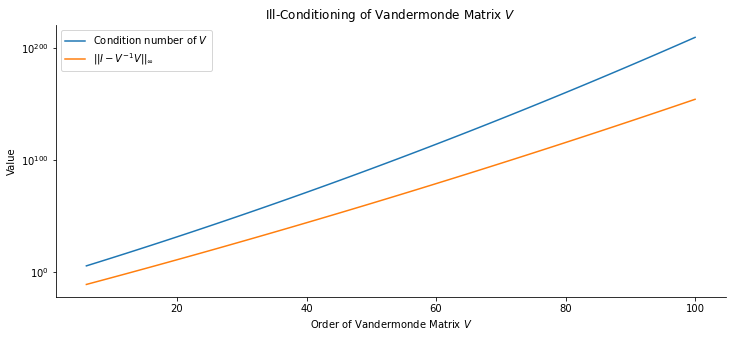

In [4]:
fig, ax = plt.subplots(figsize=[12, 5])
ax.plot(n, conv, label='Condition number of $V$')
ax.plot(n, errv, label="$||I-V^{-1}V||_\infty$")
ax.set(
    title='Ill-Conditioning of Vandermonde Matrix $V$', 
    xlabel='Order of Vandermonde Matrix $V$', 
    ylabel='Value', 
    yscale='log', 
    yticks=[1,1e100,1e200])
ax.legend()
ax.spines[['top', 'right']].set_visible(False)